In [16]:
import pandas as pd
from pydataset import data
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from statsmodels.formula.api import ols

ModuleNotFoundError: No module named 'viz'

### 1. Load the tips dataset

In [2]:
df = data('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [4]:
# assign x and y

x = df['tip']
y = df['total_bill']

In [5]:
# establish a baseline

df['baseline'] = y.mean()
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,19.785943
2,10.34,1.66,Male,No,Sun,Dinner,3,19.785943
3,21.01,3.50,Male,No,Sun,Dinner,3,19.785943


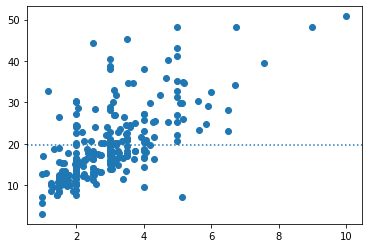

In [6]:
# plot data with baseline:

plt.scatter(x, y)
plt.axhline(y.mean(), ls = ':')

In [12]:
# generate parameters, i.e. create model
ols_model = ols('total_bill ~ tip', data=df).fit()

# compute predictions and add to original dataframe
df['yhat'] = ols_model.predict(x)

df.head(3)

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,19.785943,11.141475
2,10.34,1.66,Male,No,Sun,Dinner,3,19.785943,13.967489
3,21.01,3.50,Male,No,Sun,Dinner,3,19.785943,21.967283


### 3. Plot the residuals for the linear regression model that you made

In [17]:
# establishing my residuals

df['residual'] = y - df.yhat
df['baseline_residual'] = y - df.baseline
df.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual,baseline_residual
1,16.99,1.01,Female,No,Sun,Dinner,2,19.785943,11.141475,5.848525,-2.795943
2,10.34,1.66,Male,No,Sun,Dinner,3,19.785943,13.967489,-3.627489,-9.445943
3,21.01,3.50,Male,No,Sun,Dinner,3,19.785943,21.967283,-0.957283,1.224057
4,23.68,3.31,Male,No,Sun,Dinner,2,19.785943,21.141218,2.538782,3.894057
5,24.59,3.61,Female,No,Sun,Dinner,4,19.785943,22.445532,2.144468,4.804057


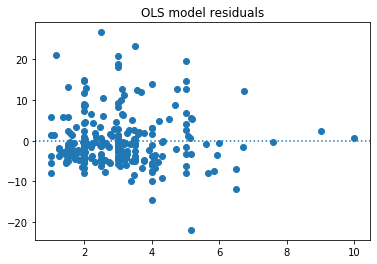

In [18]:
# plotting my model residuals

plt.scatter(x, df.residual)
plt.axhline(y = 0, ls = ':')
plt.title('OLS model residuals');

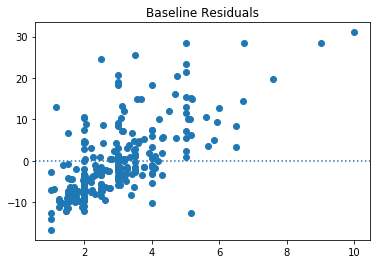

In [19]:
# plotting my baseline residuals

plt.scatter(x, df.baseline_residual)
plt.axhline(y = 0, ls = ':')
plt.title('Baseline Residuals');

### 4. Calculate the:
- mean squared error (MSE)
- sum of squared errors (SSE)
- root mean squared error (RMSE)
- total sum of squares (TSS)
    - TSS = SSE_baseline
    - TSS = SSE + ESS
- explained sum of squares (R<sup>2</sup>)
    - $R^2$ = ESS/TSS
    - $R^2$ = 1 - SSE/TSS  (since ESS + SSE = TSS)

In [31]:
# setting the squares

df['residual^2'] = df.residual ** 2

In [32]:
# calculating my SSE

SSE = sum(df['residual^2'])

print("SSE = ", SSE)

SSE =  10464.729955151068


In [33]:
# calculating my MSE

MSE = SSE/len(df)

print("MSE = ", MSE)

MSE =  42.88823752111093


In [34]:
# calculating my RMSE

from math import sqrt
RMSE = sqrt(MSE)

print("RMSE = ", RMSE)

RMSE =  6.548911170653556


In [35]:
# calculating my ESS and TSS

ESS = sum((df.yhat - y.mean())**2)
TSS = ESS + SSE

print("ESS = ", ESS)
print("TSS = ", TSS)

ESS =  8793.734128045635
TSS =  19258.464083196704


### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model

In [36]:
# calculating my baseline SSE

df['residual_baseline^2'] = df.baseline_residual ** 2
SSE_baseline = sum(df['residual_baseline^2'])
print("SSE - baseline = ", SSE_baseline)

SSE - baseline =  19258.464083196715


In [37]:
# calculating my baseline MSE

MSE_baseline = SSE_baseline/len(df)
print("MSE baseline = ", MSE_baseline)

MSE baseline =  78.92813148851113


In [38]:
# calculating my baseline RMSE

RMSE_baseline = sqrt(MSE_baseline)
print("RMSE baseline = ", RMSE_baseline)

RMSE baseline =  8.88415057777113


### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [45]:
print("SSE = ", SSE)
print("SSE - baseline = ", SSE_baseline)

if SSE < SSE_baseline:
    print("My model beat my baseline.")
else: 
    print("My baseline was better that my model")

SSE =  10464.729955151068
SSE - baseline =  19258.464083196715
My model beat my baseline.


### 7. What is the amount of variance explained in your model?

In [41]:
# Calculate R2

R2 = ESS/TSS
R2

0.4566165863516758

### 8. Is your model significantly better than the baseline model?

- Answer: yes